In [260]:
from collections import Counter
import os
import pickle

cent19words = []
cent20words = []

def txt_to_counts(tfile):
    
    words = []
    with open(tfile, "r+") as f:
        f.readline()
        for line in f:
            info = line.split()
            words.append(info[1])
            # went with lemma instead of actual word because the lemmas were already stripped for upper/lowercase
    counts = Counter(words)
    return counts



rootdir19 = 'C:\\Users\\David\\Desktop\\CompSemanticsProject\\text_files_centuries\\20th_century'
century_counts = Counter()
cur_c = 0
past_year=0
years = []

for subdir in os.listdir(rootdir19):
    #yield subdir, dirs, files
    
    for file in os.listdir(rootdir19+"\\"+subdir):     
        #print(file)
        #print(os.path.join(rootdir19+"\\"+subdir+"\\"+file))
        past_year = year
        curr_counts = txt_to_counts(os.path.join(rootdir19+"\\"+subdir+"\\"+file)) 
        year = file.split("_")
        year = year[1] 
        if past_year == year:
            cur_c += 1
        else:
            cur_c = 0
            past_year
        years.append(int(year)+(cur_c/100.0))
        century_counts["who"+"_"+year+"_"+str(cur_c) ] =  curr_counts["who"]
        
        
    


Counter({1917: 431, 1911: 312, 1949: 274, 1980: 256, 1981: 237, 1921: 224, 1904: 210, 1987: 209, 1969: 206, 1989: 187, 1962: 186, 1966: 175, 1954: 167, 1902: 161, 1915: 155, 1967: 151, 1948: 148, 1964: 145, 1918: 142, 1940: 135, 1978: 135, 1932: 131, 1973: 130, 1979: 129, 1941: 128, 1939: 127, 1945: 127, 1925: 126, 1938: 124, 1947: 120, 1975: 120, 1913: 118, 1944: 118, 1920: 117, 1959: 117, 1923: 108, 1946: 106, 1961: 106, 1931: 105, 1934: 103, 1950: 102, 1943: 100, 1955: 94, 1935: 93, 1933: 91, 1971: 85, 1951: 84, 1958: 84, 1965: 83, 1974: 83, 1970: 82, 1942: 79, 1956: 79, 1986: 79, 1907: 77, 1909: 77, 1960: 77, 1910: 76, 1922: 75, 1972: 74, 1977: 74, 1952: 73, 1982: 70, 1963: 69, 1985: 67, 1916: 65, 1930: 65, 1976: 65, 1957: 60, 1953: 59, 1988: 59, 1983: 58, 1901: 56, 1903: 56, 1984: 56, 1924: 53, 1900: 52, 1936: 52, 1937: 52, 1912: 47, 1914: 40, 1927: 36, 1906: 30, 1919: 29, 1995: 28, 1905: 23, 1990: 23, 1928: 18, 1908: 16, 1926: 16, 1998: 15, 1999: 15, 1968: 14, 1992: 13, 1996: 13,

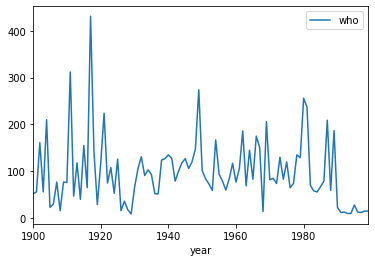

In [261]:
import pandas as pd
import numpy as np
from collections import Counter
years = Counter()
past_year = 0
feature_count_df = pd.DataFrame([])
for yer in century_counts:
    year = yer.split("_")[1]
    #print(century_counts[yer])
    if year not in years:
        years[int(year)] = century_counts[yer] 
    else:
        years[int(year)] = years[int(year)]+ century_counts[yer] 
print(years)     
feature_count_df = pd.DataFrame(list(years.items()), columns = ["year","who"] )
feature_count_df.set_index(["year","who"])
feature_count_df["cent"] = ["20th" for num in range(len(feature_count_df.year))]

#feature_count_df.to_csv("whom_20.csv")


%matplotlib inline
plot = feature_count_df.plot( x = "year" , y = "who" )

